In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test (1).csv')

In [ ]:
print(train.isnull().sum())

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64


In [ ]:
train.head(5)

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [ ]:
train.drop(columns=["id"], inplace=True)
train.head(5)

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


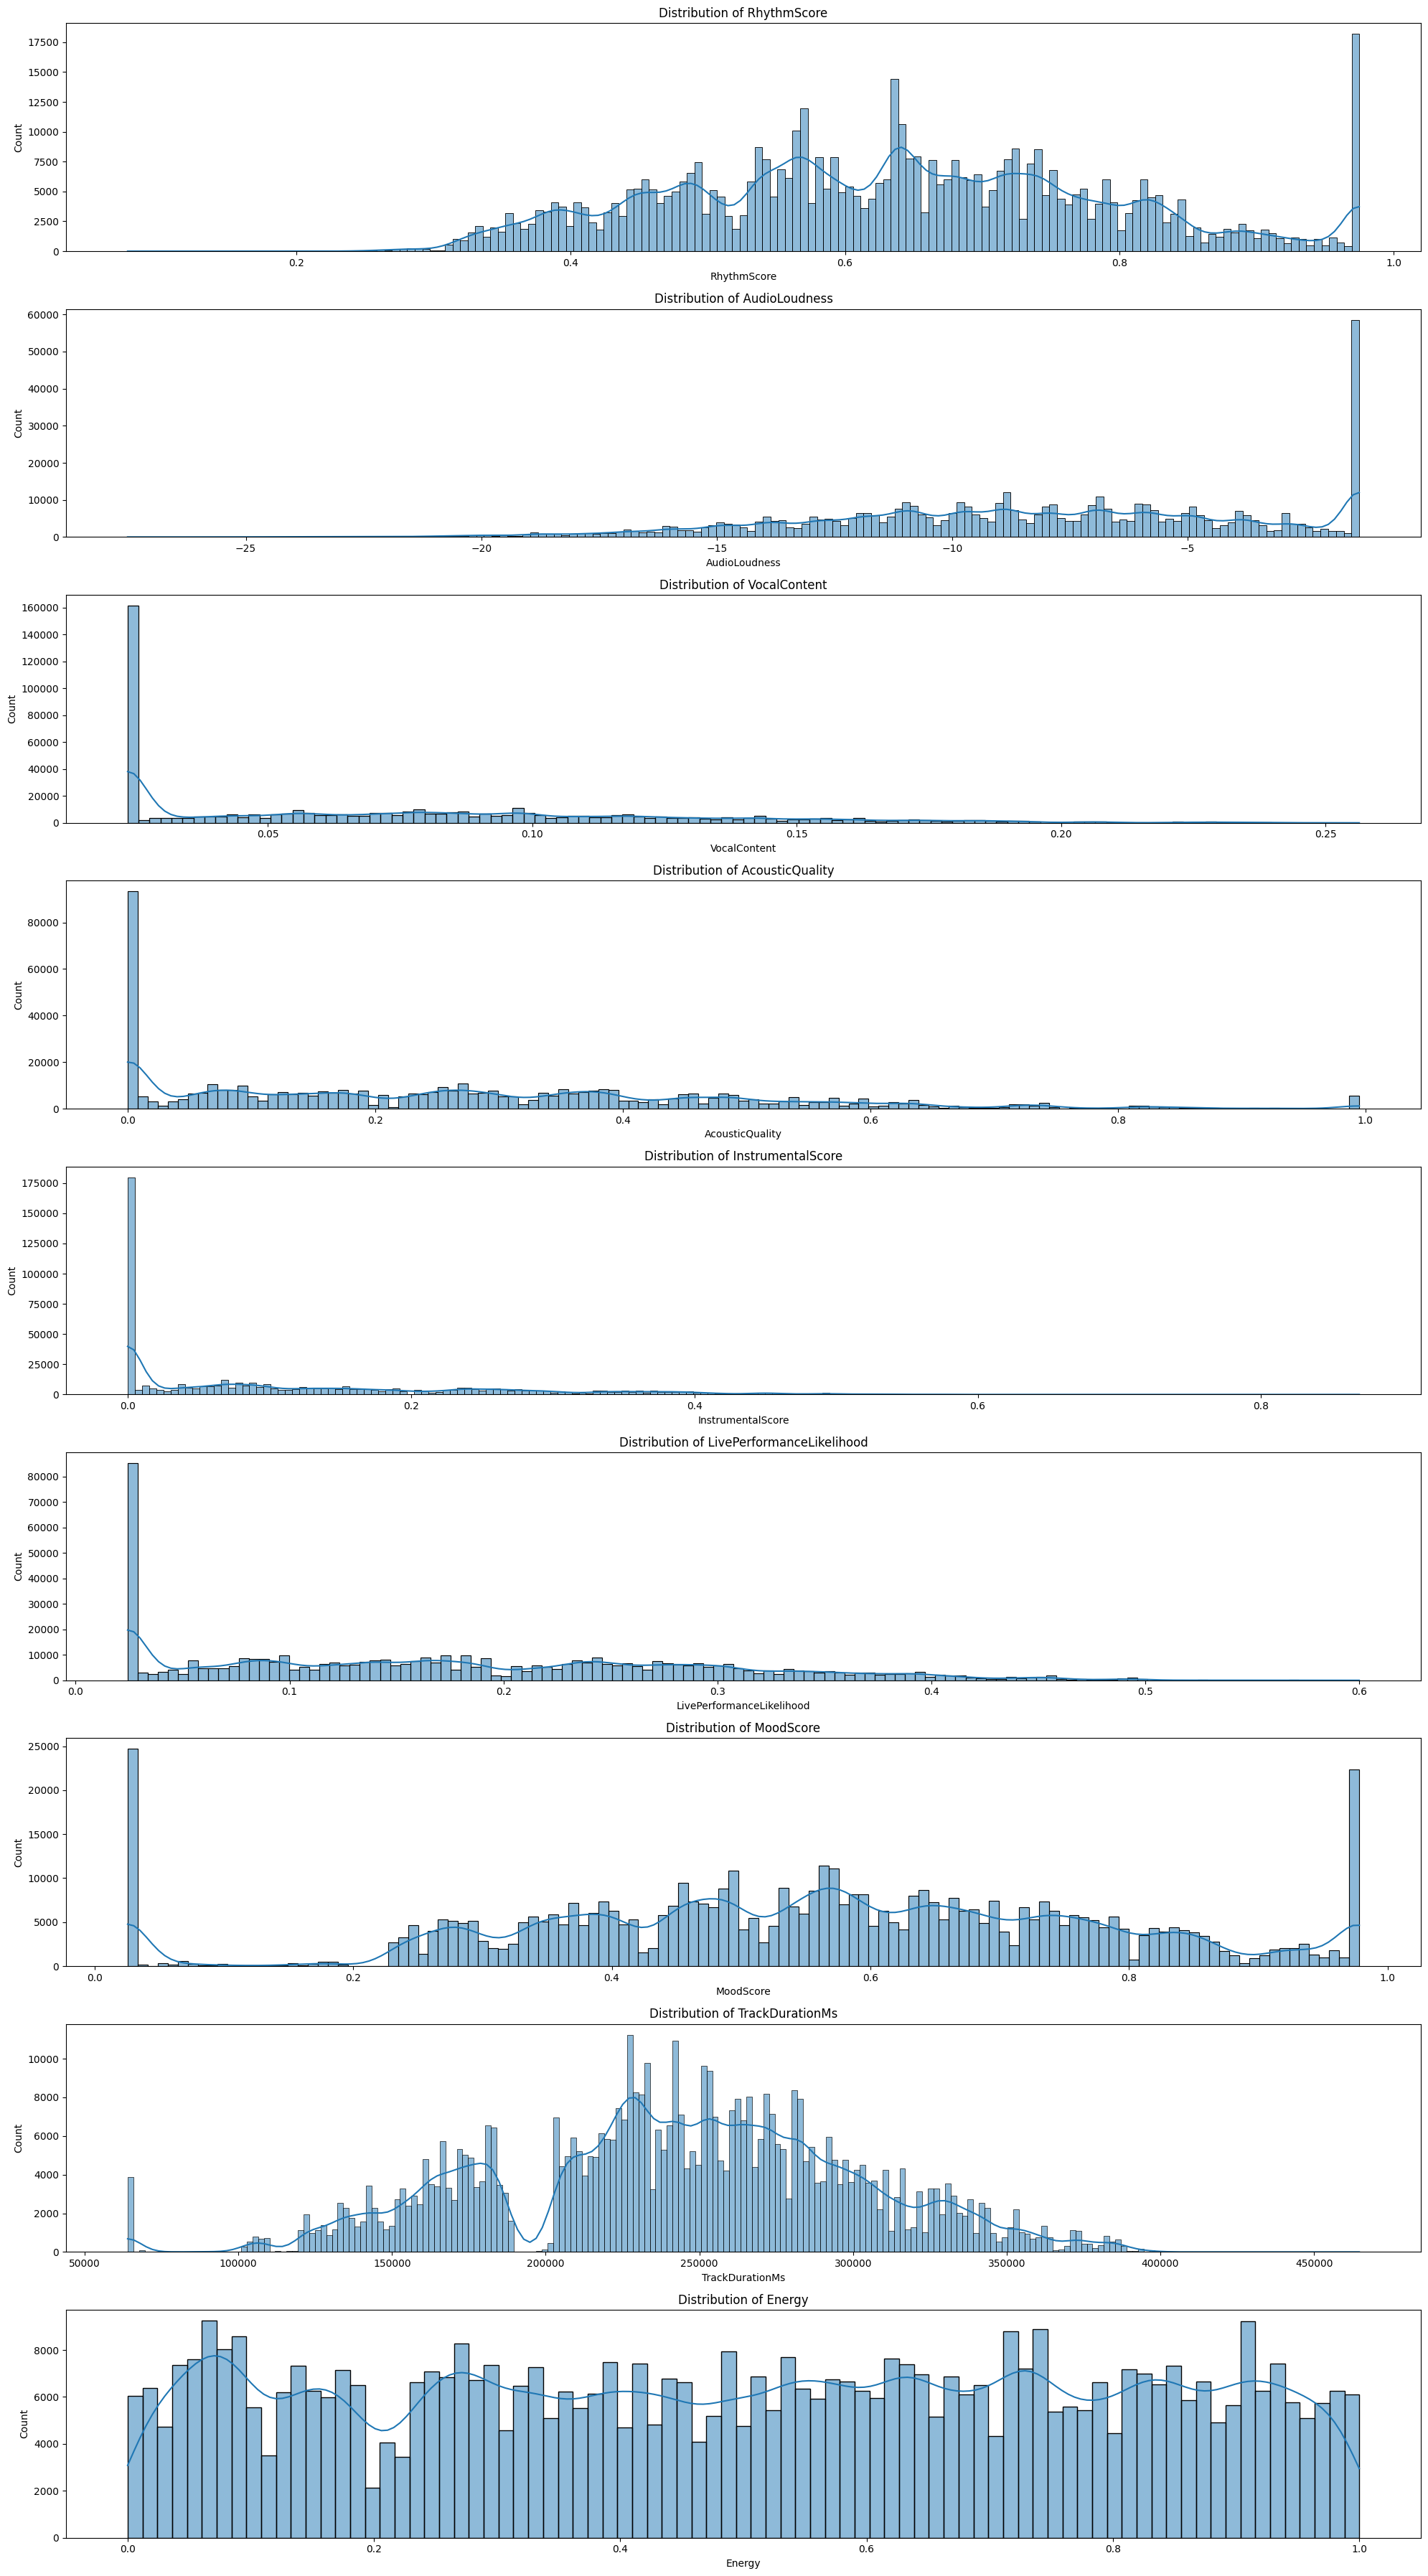

In [ ]:
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality', 'InstrumentalScore',
            'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy']

plt.figure(figsize=(20, 4*len(features)))
for i, feature in enumerate(features):
  plt.subplot(len(features),1, i + 1)
  sns.histplot(data=train, x=feature, kde=True)
  plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

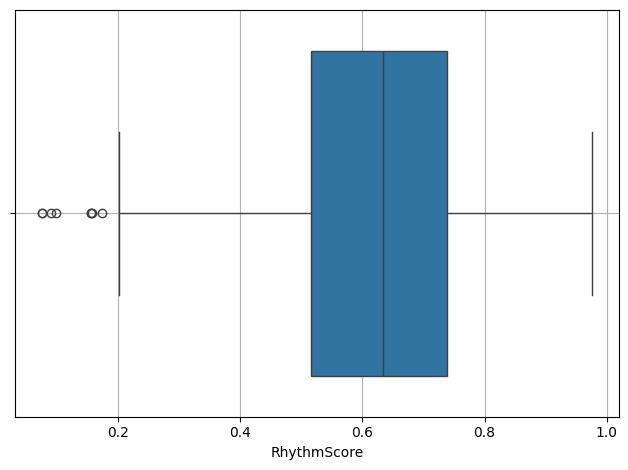

In [ ]:
sns.boxplot(x = train.RhythmScore)
plt.grid(True)
plt.tight_layout()
plt.show()

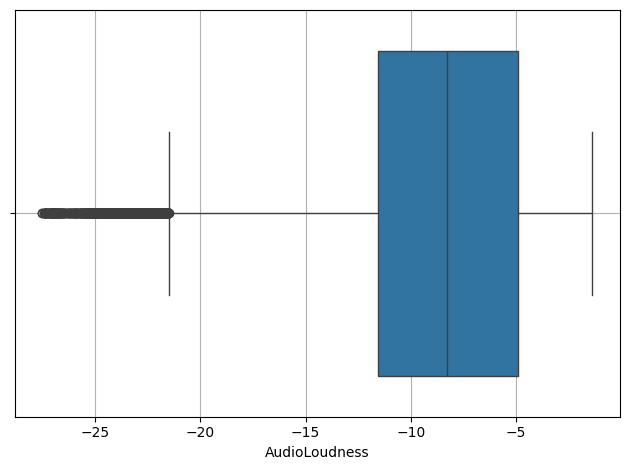

In [ ]:
sns.boxplot(x = train.AudioLoudness)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

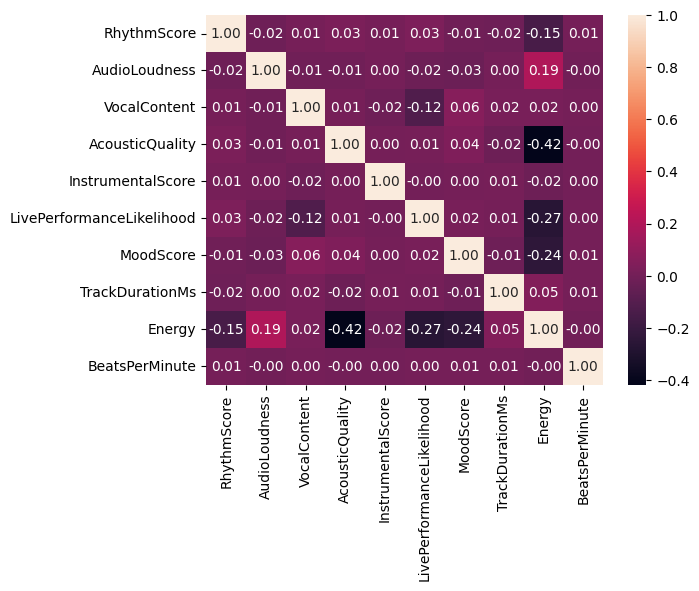

In [ ]:
sns.heatmap(train.corr(), annot = True, fmt = '.2f')

In [ ]:
'''f1 = train['RhythmScore'].copy()

Q1 = np.percentile(f1, 25)
Q3 = np.percentile(f1, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
outliers = f1[(f1 < lower_bound) | (f1 > upper_bound)]

median = f1[(f1 >= lower_bound) & (f1 <= upper_bound)].median()
f1[f1 < lower_bound] = np.nan
f1[f1 > upper_bound] = np.nan
f1.fillna(median,inplace=True)'''

"f1 = train['RhythmScore'].copy()\n\nQ1 = np.percentile(f1, 25)\nQ3 = np.percentile(f1, 75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\nprint(lower_bound)\nprint(upper_bound)\noutliers = f1[(f1 < lower_bound) | (f1 > upper_bound)]\n\nmedian = f1[(f1 >= lower_bound) & (f1 <= upper_bound)].median()\nf1[f1 < lower_bound] = np.nan\nf1[f1 > upper_bound] = np.nan\nf1.fillna(median,inplace=True)"

In [ ]:
for feature in train:
  f1 = train[feature]
  Q1 = np.percentile(f1, 25)
  Q3 = np.percentile(f1, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = f1[(f1 < lower_bound) | (f1 > upper_bound)]
  median = f1[(f1 >= lower_bound) & (f1 <= upper_bound)].median()
  f1[f1 < lower_bound] = np.nan
  f1[f1 > upper_bound] = np.nan
  f1.fillna(median,inplace=True)

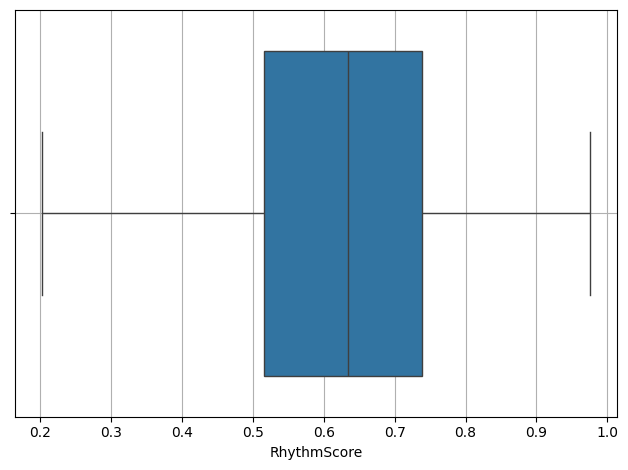

In [ ]:
sns.boxplot(x = train.RhythmScore)
plt.grid(True)
plt.tight_layout()
plt.show()

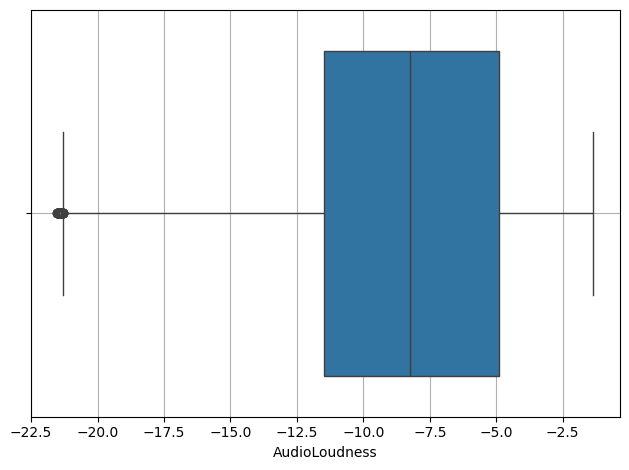

In [ ]:
sns.boxplot(x = train.AudioLoudness)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

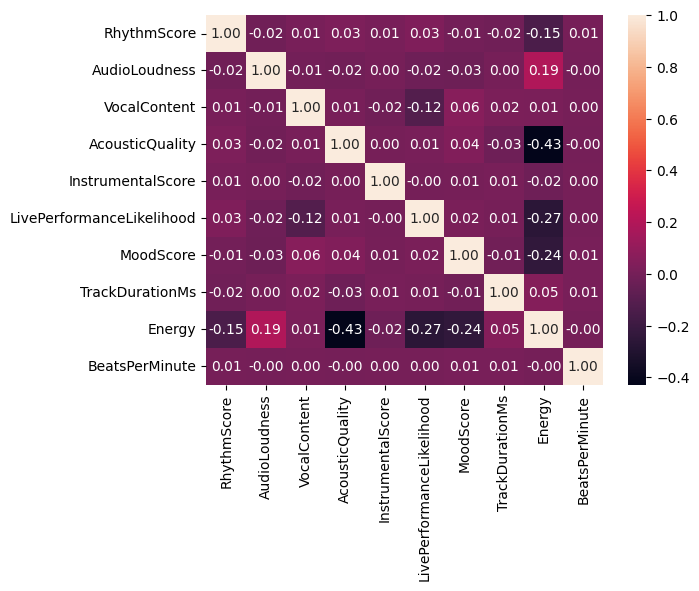

In [ ]:
sns.heatmap(train.corr(), annot = True, fmt = '.2f')

In [ ]:
train['LPLMood'] = train['LivePerformanceLikelihood'] * train['MoodScore']
train["RhythmEnergy"] = train["RhythmScore"] * train["Energy"]
train["AcousticVocals"] = train["AcousticQuality"] * train["VocalContent"]
train["RhythmDuration"] = train["RhythmScore"] * train["TrackDurationMs"]

train.drop(columns=['VocalContent'], inplace=True)
train.drop(columns=['RhythmScore'], inplace=True)

In [ ]:
test['LPLMood'] = test['LivePerformanceLikelihood'] * test['MoodScore']
test["RhythmEnergy"] = test["RhythmScore"] * test["Energy"]
test["AcousticVocals"] = test["AcousticQuality"] * test["VocalContent"]
test["RhythmDuration"] = test["RhythmScore"] * test["TrackDurationMs"]

test.drop(columns=['VocalContent'], inplace=True)
test.drop(columns=['RhythmScore'], inplace=True)

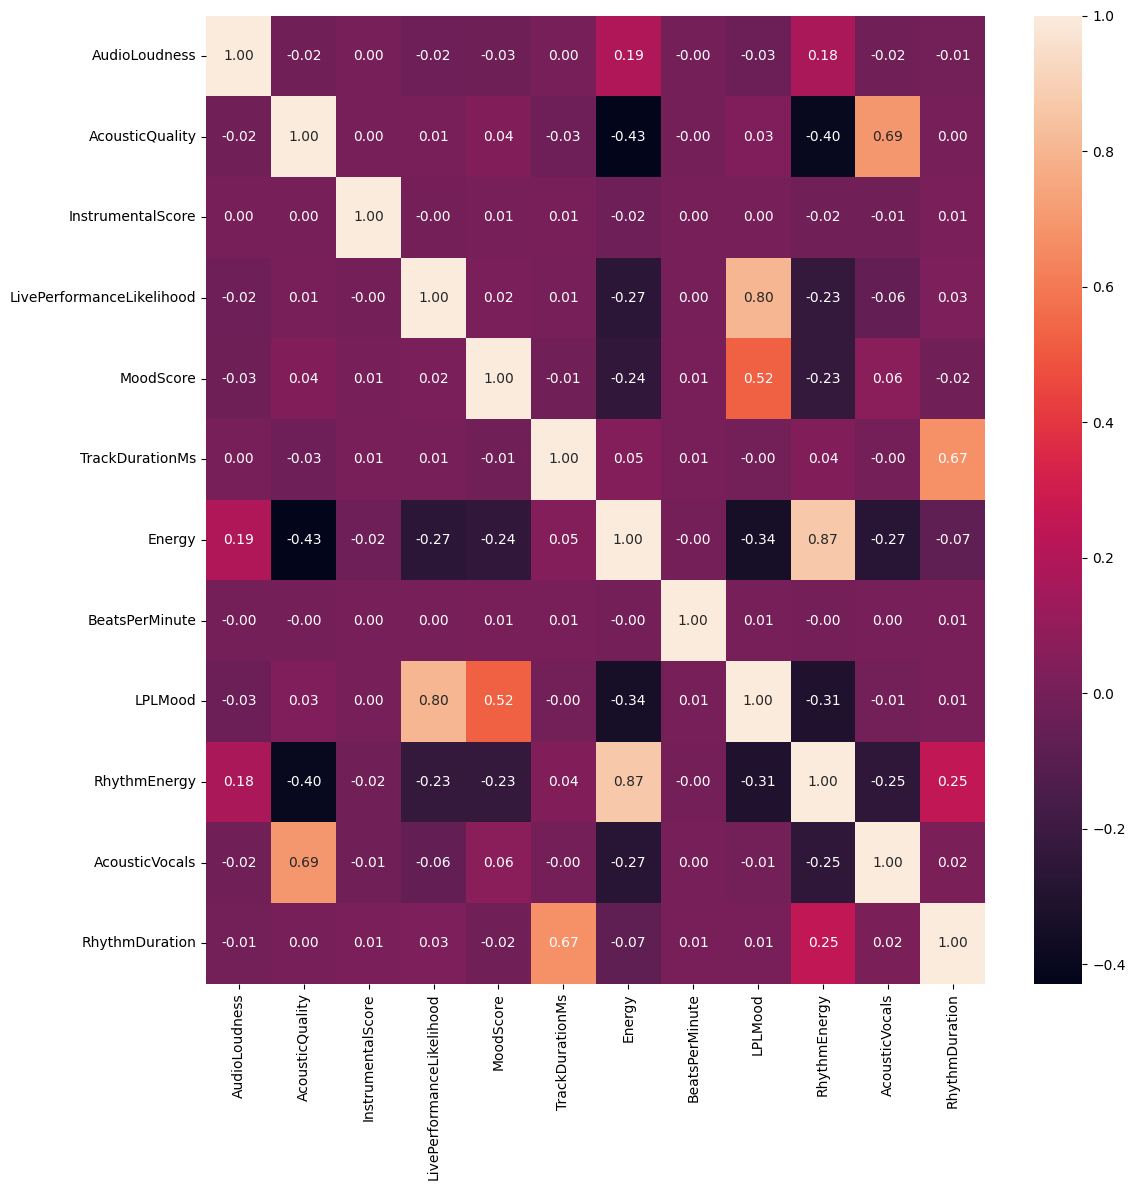

In [ ]:
plt.figure(figsize=(12, 12))

sns.heatmap(train.corr(),annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = train.drop(columns=["BeatsPerMinute"])
y = train["BeatsPerMinute"]

X_train, X_value, y_train, y_value = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_value = scaler.transform(X_value)

In [ ]:
'''param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=30)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='r2',
    verbose=1,
    random_state=30,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_value)'''

"param_grid = {\n    'n_estimators': [100, 200],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5],\n    'min_samples_leaf': [1, 2],\n    'max_features': ['sqrt', 'log2']\n}\n\nrf = RandomForestRegressor(random_state=30)\nrandom_search = RandomizedSearchCV(\n    estimator=rf,\n    param_distributions=param_grid,\n    n_iter=5,\n    cv=3,\n    scoring='r2',\n    verbose=1,\n    random_state=30,\n    n_jobs=-1\n)\n\nrandom_search.fit(X_train, y_train)\n\nbest_rf = random_search.best_estimator_\n\ny_pred = best_rf.predict(X_value)"

In [ ]:
'''rmse = np.sqrt(mean_squared_error(y_value, y_pred))
r2 = r2_score(y_value, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Random Forest Regression RMSE:", rmse)
print("Random Forest Regression R²:", r2)'''

'rmse = np.sqrt(mean_squared_error(y_value, y_pred))\nr2 = r2_score(y_value, y_pred)\n\nprint("Best Parameters:", random_search.best_params_)\nprint("Random Forest Regression RMSE:", rmse)\nprint("Random Forest Regression R²:", r2)'

In [ ]:
'''X_test = test.drop(columns=["id"])
test_predictions = best_rf.predict(X_test)

submission = test.copy()
submission["BeatsPerMinute"] = test_predictions

features = ['AudioLoudness', 'AcousticQuality', 'InstrumentalScore',
            'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy',
            'LPLMood', 'RhythmEnergy', 'AcousticVocals', 'RhythmDuration']

submission.drop(columns=features, inplace=True)

submission.to_csv("PredictionsRandomForest.csv", index=False)
submission'''

'X_test = test.drop(columns=["id"])\ntest_predictions = best_rf.predict(X_test)\n\nsubmission = test.copy()\nsubmission["BeatsPerMinute"] = test_predictions\n\nfeatures = [\'AudioLoudness\', \'AcousticQuality\', \'InstrumentalScore\',\n            \'LivePerformanceLikelihood\', \'MoodScore\', \'TrackDurationMs\', \'Energy\',\n            \'LPLMood\', \'RhythmEnergy\', \'AcousticVocals\', \'RhythmDuration\']\n\nsubmission.drop(columns=features, inplace=True)\n\nsubmission.to_csv("PredictionsRandomForest.csv", index=False)\nsubmission'

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_lambda": [1, 2, 5],
    "reg_alpha": [0, 0.1, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=15,
    cv=3,
    scoring="r2",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

y_pred = best_xgb.predict(X_value)

rmse = np.sqrt(mean_squared_error(y_value, y_pred))
r2 = r2_score(y_value, y_pred)

print("Best Parameters:", random_search.best_params_)
print("XGBoost RMSE:", rmse)
print("XGBoost R²:", r2)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost RMSE: 26.00755082781565
XGBoost R²: 0.000378135790574996


In [ ]:
X_test = test.drop(columns=["id"])

submission = test.copy()
XGBoost_predictions = best_xgb.predict(X_test)
submission["BeatsPerMinute"] = XGBoost_predictions

features = ['AudioLoudness', 'AcousticQuality', 'InstrumentalScore',
            'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy',
            'LPLMood', 'RhythmEnergy', 'AcousticVocals', 'RhythmDuration']

submission.drop(columns=features, inplace=True)

submission.to_csv("PredictionsXGBoost.csv", index=False)
submission


,id,BeatsPerMinute
0,524164,118.937607
1,524165,118.809341
2,524166,118.923676
3,524167,119.044785
4,524168,119.023148
...,...,...
174717,698881,118.944069
174718,698882,118.902946
174719,698883,118.947479
174720,698884,118.913742


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200]
}

lgb_reg = lgb.LGBMRegressor(random_state=42)

grid = RandomizedSearchCV(
    estimator=lgb_reg,
    param_distributions=param_grid,
    n_iter=15,
    cv=3,
    scoring="r2",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_params = grid.best_params_
print("Best Parameters:", best_params)

best_model = lgb.LGBMRegressor(**best_params, random_state=42)
best_model.fit(
    X_train, y_train,
    eval_set=[(X_value, y_value)],
)

y_pred = best_model.predict(X_value)

rmse = np.sqrt(mean_squared_error(y_value, y_pred))
r2 = r2_score(y_value, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 419331, number of used features: 11
[LightGBM] [Info] Start training from score 118.791562
Best Parameters: {'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 419331, number of used features: 11
[LightGBM] [Info] Start training from score 118.791562
RMSE: 26.00617486403244
R²: 0.0004839056192171842


In [ ]:
X_test = test.drop(columns=["id"])

submission = test.copy()
LightGBM_predictions = best_model.predict(X_test)
submission["BeatsPerMinute"] = LightGBM_predictions

features = ['AudioLoudness', 'AcousticQuality', 'InstrumentalScore',
            'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy',
            'LPLMood', 'RhythmEnergy', 'AcousticVocals', 'RhythmDuration']

submission.drop(columns=features, inplace=True)

submission.to_csv("PredictionsLightGBM.csv", index=False)
submission


,id,BeatsPerMinute
0,524164,118.604965
1,524165,118.503395
2,524166,118.604965
3,524167,118.604965
4,524168,118.604965
...,...,...
174717,698881,118.604965
174718,698882,118.604965
174719,698883,118.604965
174720,698884,118.604965
